# Aprendizado Profundo - UFMG

## Preâmbulo

O código abaixo consiste dos imports comuns. Além do mais, configuramos as imagens para ficar de um tamanho aceitável e criamos algumas funções auxiliares. No geral, você pode ignorar a próxima célula.

O curso nosso vai fazer uso extensivo de [pytorch](https://pytorch.org/). Importamos o mesmo com as seguintes linhas:

```python
import torch
```

O framework já esta disponível no ambient do google colab, basta importa-lo

In [1]:
# !pip install mxnet-cu100==1.4.1

In [2]:
# -*- coding: utf8

import matplotlib.pyplot as plt

import torch
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [3]:
plt.ion()

plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

Para testar o resultado dos seus algoritmos vamos usar o módulo testing do numpy.

In [4]:
from numpy.testing import assert_equal
from numpy.testing import assert_almost_equal
from numpy.testing import assert_array_almost_equal

## Aula 01 - Programação Diferenciável e Tensores

Quando pensamos no lado prático do aprendizado profundo, um aspecto chave que ajuda na implementação de novos algoritmos é a chamada programação diferenciável. Na próxima aula vamos voltar na mesma. No momento, o importante é salientar que a programação diferenciável faz uso extensivo de Tensores. Um [Tensor](http://en.wikipedia.org/wiki/Tensor) é uma generalização de matrizes para mais dimensões. Quando falamos de tensores, temos três casos especiais e um genérico que engloba os outros três:

1. **Escalar:** Um tensor de zero dimensões

In [5]:
1

1

1. **Vetor:** Um tensor de uma dimensão

In [6]:
np.array([1, 2])

array([1, 2])

1. **Matrizes:** Um tensor de duas dimensões

In [7]:
np.array([[1, 2], [2, 2]])

array([[1, 2],
       [2, 2]])

1. **Tensores**. Caso geral, representam n-dimensões. Na figura temos um tensor 3x3x3.

![](./figs/tensor.png)

No exemplo abaixo, temos um tensor 3x2x2. Note ao selecionar elementos da primeira dimensão ficamos com matrizes 2x2. 

In [8]:
X = np.random.randn(3, 2, 2) # Gera números aleatórios de uma normal
X[0]

array([[-1.03404127, -0.46418714],
       [-2.01774558,  1.22800693]])

In [9]:
X[1]

array([[-0.07840046, -0.07970946],
       [-0.35790506, -0.53331957]])

In [10]:
X[2]

array([[-0.05142455, -0.01025579],
       [ 0.70477983,  1.59813775]])

## Indexando

Sendo X uma matriz:

In [11]:
X = np.array([[1, 2], [2, 2]])
X

array([[1, 2],
       [2, 2]])

`X[l]` pega uma linha

In [12]:
X[0]

array([1, 2])

`X[:, c]` pega uma coluna

In [13]:
X[:, 0]

array([1, 2])

`X[um_vetor]` pega as linhas do vetor. `X[:, um_vetor]` pega as colunas

In [14]:
X = np.array([[1, 2, 3], [2, 2, 2]])
X[:, [1, 2]]

array([[2, 3],
       [2, 2]])

`X[vetor_booleano]` Retorna as linhas (ou colunas quando `X[:, vetor_booleano]`) onde o vetor é true

In [15]:
X[[False, True]]

array([[2, 2, 2]])

## Shape, Reshape e Ravel

Todo vetor, matriz e tensor pode ser redimensionado. Observe como no tensor abaixo temos `3x2x2=12` elementos. Podemos redimensionar os mesmos para outros arrays de tamanho 12.

In [16]:
X = np.random.randn(3, 2, 2)
X.shape

(3, 2, 2)

Como matriz

In [17]:
X.reshape((2, 6))

array([[-1.85831785, -0.19259984,  1.00021577,  0.50640324,  1.11933129,
         1.14156746],
       [ 1.37183467, -1.34037063, -0.90557315, -1.1407857 ,  0.17266539,
         0.06437429]])

Outra Matriz

In [18]:
X.reshape((6, 2))

array([[-1.85831785, -0.19259984],
       [ 1.00021577,  0.50640324],
       [ 1.11933129,  1.14156746],
       [ 1.37183467, -1.34037063],
       [-0.90557315, -1.1407857 ],
       [ 0.17266539,  0.06437429]])

Um Tensor

In [19]:
X.reshape((6, 2, 1))

array([[[-1.85831785],
        [-0.19259984]],

       [[ 1.00021577],
        [ 0.50640324]],

       [[ 1.11933129],
        [ 1.14156746]],

       [[ 1.37183467],
        [-1.34037063]],

       [[-0.90557315],
        [-1.1407857 ]],

       [[ 0.17266539],
        [ 0.06437429]]])

As operações flatten e ravel organizam os elementos como um vetor.

In [20]:
X.flatten()

array([-1.85831785, -0.19259984,  1.00021577,  0.50640324,  1.11933129,
        1.14156746,  1.37183467, -1.34037063, -0.90557315, -1.1407857 ,
        0.17266539,  0.06437429])

In [21]:
X.ravel()

array([-1.85831785, -0.19259984,  1.00021577,  0.50640324,  1.11933129,
        1.14156746,  1.37183467, -1.34037063, -0.90557315, -1.1407857 ,
        0.17266539,  0.06437429])

## Conjunto de Problemas 1: Vetorização

Seu objetivo é medir a velocidade das operações de álgebra linear para diferentes níveis de vetorização. 

1. Construa duas matrizes $ A $ e $ B $ com entradas aleatórias Gaussianas de tamanho $ 128 \times 256 $. Use o módulo time para mensurar o tempo da operação.

In [22]:
# Descomente e complete
A = torch.randn(128, 256)
B = torch.randn(128, 256)

In [23]:
# testes, não apague as linhas!!
assert_equal((128, 256), A.shape)
assert_equal((128, 256), B.shape)

# A chamada asnumpy converte os vetores em vetores numpy. Útil para testes!
Anp = A.numpy()
Bnp = B.numpy()

# testando média e desvio padrão
assert_almost_equal(Anp.mean(), 0, decimal=2)
assert_almost_equal(Anp.std(ddof=1), 1, decimal=2)

assert_almost_equal(Bnp.mean(), 0, decimal=2)
assert_almost_equal(Bnp.std(ddof=1), 1, decimal=2)

2. Calcule $ C = AB^t $, tratando $ A $ como uma matriz, mas computando o resultado para cada coluna de $ B $. Isto é, use um laço `for`! Pare realizar este código, é importante entender o conceito de broadcasting. Para transpor uma matriz use `X.T`.

Em código numpy e torch, a operação de broadcasting replica linhas e colunas de tensores para realizar operações. Para entender melhor, leia o [documento](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html). A figura abaixo exemplifica broadcasting. No geral, as dimensões de arrays casam, as operações são realizadas (primeira linha da figura). Mesmo quando as dimensões não casem, se a última dimensão for compatível é feito a replicação (broadcasting), ver a segunda linha da figura. Por fim, mesmo quando as dimensões não casam mas uma delas é 1 (4x1 + 1x3 na linha 3), é feito broadcasting.

Para fazer o código em uma linha apenas, você vai focar no caso da linha 2 da figura. Multiplique uma linha de A por B. Depois disso, use `.sum(axis=...)`.

![](./figs/broadcasting.png)

In [24]:
C = torch.zeros(128, 128)
for linha in range(B.shape[0]):
    C[linha] = (A[linha] * B).sum(axis=1)

In [25]:
# testes, não apague as linhas!!
Cteste = torch.mm(A, B.T).numpy()  # faz a leitura, realiza operação
assert_array_almost_equal(Cteste, C.numpy(), decimal=3)

3. Calcule $ C = AB^t $ usando operações matriciais. Ou seja, sem usar nenhum laço. Ao mensurar o tempo, ficou mais rápido?

In [26]:
C = torch.mm(A, B.T)

In [27]:
# testes, não apague as linhas!!
Cteste = torch.mm(A, B.T).numpy()  # faz a leitura, realiza operação
assert_array_almost_equal(Cteste, C.numpy(), decimal=3)

## Conjunto de Problemas 2: Computação eficiente de memória

Crie duas matrizes aleatórias de tamanho $4096 \times 4096$. Chame as mesmas de A e B novamente.



In [28]:
A = torch.randn(4096, 4096)
B = torch.randn(4096, 4096)

Queremos calcular $ C \leftarrow A \cdot B + C $, onde $ A, B $ e $ C $ são todas matrizes. Implemente isso da maneira mais eficiente em termos de memória!

4. Não aloque nova memória para o novo valor de $ C $. Não aloque nova memória para resultados intermediários, se possível. Leia a seção de Saving Memory do [d2l.ai](http://d2l.ai/chapter_crashcourse/ndarray.html).

In [29]:
C = torch.zeros(A.shape)
C[:] = torch.mm(A, B) + C

In [30]:
# testes não apague!
Cteste = (torch.mm(A, B)).numpy()  # faz a leitura, realiza operação
assert_array_almost_equal(Cteste, C.numpy(), decimal=3)

5. Crie uma função que recebe (A, B e C). A mesma deve atualizar C sem alocar memória nova. Além do mais, a função recebe um número de iterações para atualizar C.

In [31]:
def update_c(C, A, B, niter=2):
    D = torch.mm(A, B)
    for i in range(niter):
        C[:] = D + C

In [32]:
# testes não apague!
Ct = torch.zeros(A.shape)
Cteste = (Ct + torch.mm(A, B))
Cteste = (Cteste + torch.mm(A, B)).numpy()

C = torch.zeros(A.shape)
update_c(C, A, B, 2)
assert_array_almost_equal(Cteste, C.numpy(), decimal=3)

## Conjunto de Problemas 3: Programação Diferenciável

Agora vamos aprender um dos pontos chaves de fazer uso de bibliotecas como pytorch/tensorflow/etc, a programação diferenciável. Diferente do exercício que vocês fizeram na mão, usando a biblioteca conseguimos derivar de forma automágica. Portanto, observe como o código abaixo deriva a função seno.

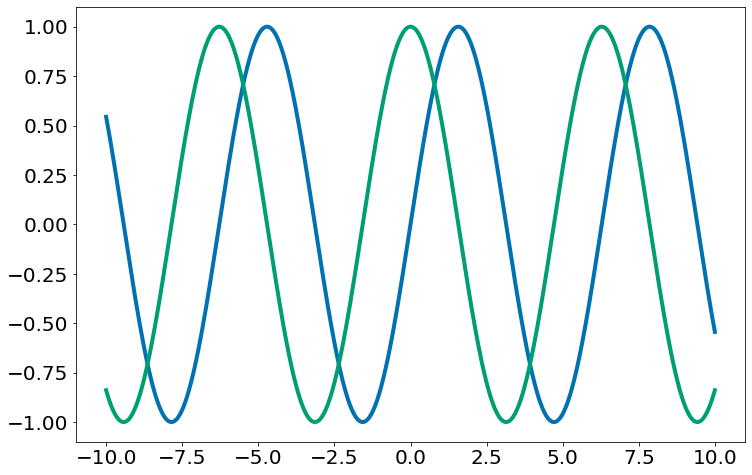

In [33]:
x = np.linspace(-10, 10, 1000)
x_torch = torch.tensor(x,requires_grad=True)
#with mx.autograd.record(): # liga o modo treino, vamos derivar e otimizar coisas.
y = torch.sin(x_torch)
v = torch.ones(x_torch.shape, dtype = torch.double) #Devido ao fato de que o y final não é um escalar precisamos passar o vetor v tal que v é a jacobiana pela qual vamos multiplicar as jacobianas da variavel node (neste caso, x) conforme descrito em https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
#Como aqui x da origem a y diretamente, nosso v sera apenas um vetor de 1's com a mesma dimensao de x
y.backward(v)

plt.plot(x_torch.detach().numpy(), y.detach().numpy(), label='sin(x)')
plt.plot(x_torch.detach().numpy(), x_torch.grad.numpy(), label='sin\'(x)')

O resultado é a mesma curva da função cosseno! Para entender melhor o autograd, leia a seção respectiva do [pyTorch Blitz](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html).

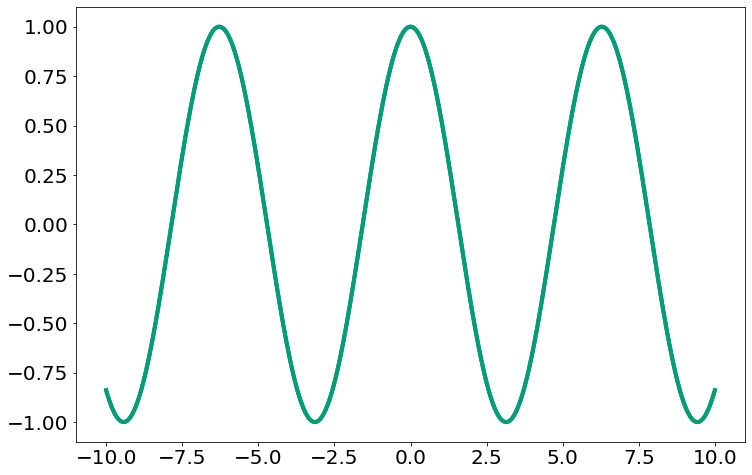

In [34]:
plt.plot(x_torch.detach().numpy(), x_torch.grad.numpy(), label='sin\'(x)')
plt.plot(x_torch.detach().numpy(), torch.cos(x_torch).detach().numpy(), label='cos(x)')


6. Derive a função logística usando pytorch.

$$f(x) = \frac{1}{1 + e^{-x}}$$

In [35]:
x = np.linspace(-10, 10, 1000) # Não mude o valor de x!
x_torch = torch.tensor(x)
x_torch.requires_grad_(True)
#with mx.autograd.record():
y = 1.0 / (1.0 + torch.exp(-x_torch))
v = torch.ones(x_torch.shape, dtype = torch.double) 
y.backward(v)

In [36]:
y_test = 1.0/(1 + np.exp(-x))
derivada_teste = y_test * (1 - y_test)
assert_array_almost_equal(derivada_teste, x_torch.grad.numpy(), decimal=3)

A operação *dettach* permite quebrar a computação em várias partes. Em particular, isto é útil para aplicar a regra da cadeia. Suponha que $u = f(x)$ e $z = g(u)$, pela regra da cadeia, temos $\frac{dz}{dx}$ = $\frac{dz}{du}\frac{du}{dx}$. Para calcular $\frac{dz}{du}$, podemos primeiro separar $u$ da computação e, em seguida, chamar `z.backward()` para calcular o primeiro termo.

Observe no caso abaixo como derivamos $u = x^2$. A resposta deve ser $2x$ para cada termo `[0, 1, 2, 3]`.

In [37]:
x = torch.arange(4, dtype =torch.float)
x.requires_grad_(True)
#with mx.autograd.record():
u = x * x
jacobX = torch.ones(x.shape) 
u.backward(jacobX)
x.grad

tensor([0., 2., 4., 6.])

Agora vamos fazer $z = u^3$ e computar as derivadas intermediarias.

In [38]:
x = torch.arange(4, dtype = torch.float)
x.requires_grad_(True)
#with mx.autograd.record():
u = x * x
v = u.detach()  # u still keeps the computation graph
v.requires_grad_(True)
z = v * v * v

jacobX = torch.ones(x.shape) 
u.backward(jacobX)
x.grad

tensor([0., 2., 4., 6.])

Acima temos a derivada de x ao quadrado. Abaixo temos a derivada de g(x^2).

In [39]:
jacobV = torch.ones(v.shape) 
z.backward(jacobV)
v.grad

tensor([  0.,   3.,  48., 243.])

7. Agora, sendo $f(x) = 1 + x^2$ e $g(x) = 1 + 7 x^9$. Vamos aplicar a regra da cadeia em pytorch

In [40]:
x = torch.arange(4, dtype = torch.float)
x.requires_grad_(True)
#with mx.autograd.record():
u = 1 + x * x
v = u.detach()  # u still keeps the computation graph
v.requires_grad_(True)
z = 1 + 7 * torch.pow(v, 9)
jacobX = torch.ones(x.shape)
u.backward(jacobX)

In [41]:
# teste para x
assert_array_almost_equal([0, 2, 4, 6], x.grad.numpy())

In [42]:
jacobV = torch.ones(v.shape)
z.backward(jacobV)

In [43]:
# teste para gx
expected = np.array([6.3000000e+01, 1.6128000e+04, 2.4609376e+07, 6.300000256000e+09])
assert_array_almost_equal(expected, v.grad.numpy(), 12)

## Conjunto de Problemas 4: Perceptron from Scratch

Por fim, vamos implementar o algoritmo de Perceptron usando mxnet. Inicialmente, vamos gerar dois blobs linearmente separáveis. Com um seed bem setado, claramente teremos duas classes abaixo.

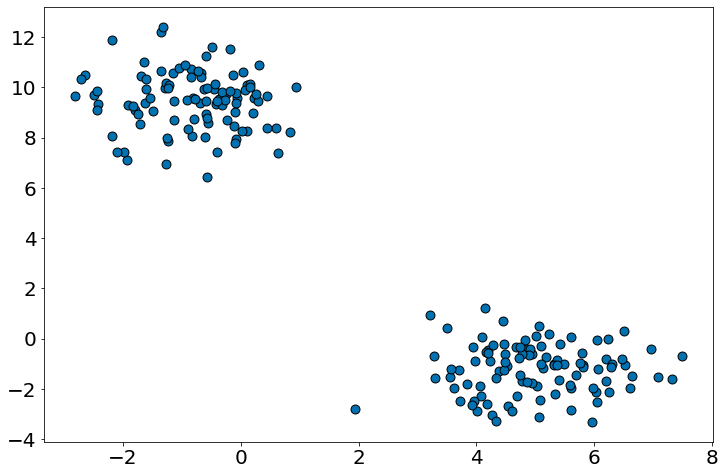

In [44]:
from sklearn import datasets
state = np.random.seed(20190187)

X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=2)
plt.scatter(X[:, 0], X[:, 1], s=80, edgecolors='k')

8. Converta X e y para tensores torch

In [45]:
X= torch.tensor(X)
y = torch.tensor(y)

Para realizar as nossas previsões, precisamos aplicar a seguinte função:

$$\hat{y}_i = \frac{1}{1 + e^{-(1 + \theta_1 x_{i1} + \theta_1 x_{i2}) + \cdots}}$$

Aqui $\hat{y}_i$ é a previsão de um único elemento. Podemos gerar uma matriz de previsões usando a forma matricial abaixo.

![](./figs/linear.png)

9. Sabendo que precisamos de uma coluna de valores 1 na nossa entrada $\mathbf{X}$, implemente uma função chamada `add_intercept` que adicionar uma nova coluna em X. A mesma deve retornar uma cópia! Não altere a matriz original.

In [46]:
def add_intercept(X):
    Xn = torch.zeros(X.shape[0], X.shape[1] + 1)
    Xn[:, 0]= 1
    Xn[:, 1:] = X
    return Xn

In [47]:
# testes, não apague!
X_teste = torch.zeros(4, 4)
X_novo_teste = add_intercept(X_teste)
X_novo_teste = X_novo_teste.numpy()
assert_equal(X_teste.shape[0], X_novo_teste.shape[0])
assert_equal(X_teste.shape[1] + 1, X_novo_teste.shape[1])
assert_array_almost_equal(np.ones(X_novo_teste.shape[0]), X_novo_teste[:, 0])

10. Implemente uma função activation que faz uso da sigmoid. A mesma deve retornar um vetor de previsões para um X de entrada. Como regra, assuma que quando a ativação tem valor maior do que 0.5 vamos prever a classe 1. Então, sua resposta deve ser um vetoe de 0s e 1s apenas. Não use nenhum laço!!

In [48]:
def activation(X, theta, limiar=0.5):
    #X = X.view(-1,len(theta)) # Explicar 
    return 1.0 / (1 + torch.exp(-torch.matmul(X, theta)))

In [49]:
# testes, não apague!
X_teste = torch.randn(1000, 20000)
theta = torch.randn(20000,1)
y_hat_teste = activation(X_teste, theta)
assert_equal(True, (y_hat_teste >= 0).numpy().all())
assert_equal(True, (y_hat_teste <= 1).numpy().all())

11. Por fim, implemente agora o algoritmo do perceptron. O mesmo deve retornar um vetor de parâmetros theta. Execute o mesmo em X (com ou sem intercepto, no nosso exemplo simples não importa muito).

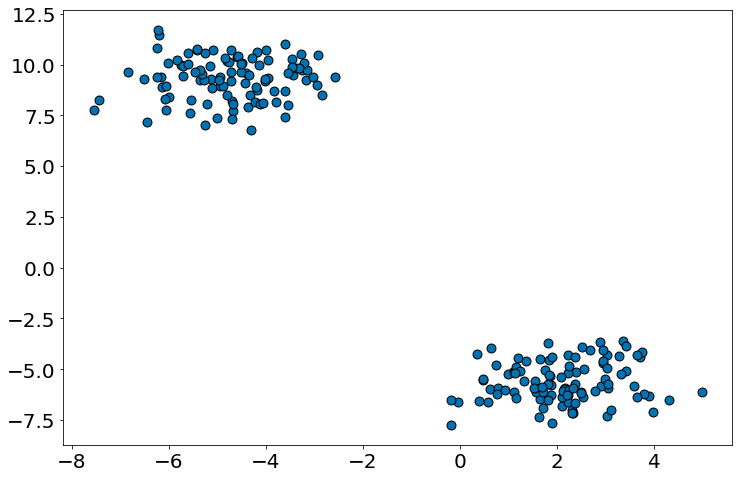

In [50]:
state = np.random.seed(2017014421)
X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=2)
plt.scatter(X[:, 0], X[:, 1], s=80, edgecolors='k')

X = torch.tensor(X)
y = torch.tensor(y)

In [51]:
def perceptron(X, y, rate=0.005):
    Xn = add_intercept(X)
    theta = torch.ones(Xn.shape[1],1)
    for _ in range(10):
        for i in range(X.shape[0]):
            Xi = Xn[i]
            yt = y[i].numpy()
            yp = 1 if activation(Xi, theta) > 0.5 else 0 
            update = rate * (yt - yp) * Xi
            update = update.view(-1,1)
            theta = theta + update
    return theta
theta = perceptron(X, y)

Seu perceptron deve prever perfeitamente as classes!

In [52]:
Xn = add_intercept(X)
y_p = (activation(Xn, theta) > 0.5).view(1,-1).int()
y = y.int()
(y_p == y).int().reshape(1,-1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]], dtype=torch.int32)